# IMPORT HEADERS AND PACKAGES

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import datetime
from pandas_datareader import data

In [2]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

# CONFIGURE CHARTING

In [3]:
rcParams['figure.figsize'] = 8,5
sb.set_style('whitegrid')

# IMPORT AND VERIFY DATASET

In [28]:
address = 'C:/final_data.csv'
df = pd.read_csv(address, index_col='Date', parse_dates=True)
df

,SPX,10D,20D,30D,50D,100D,200D
Date,,,,,,,
2007-01-03,1416.60,1420.40,1417.41,1410.84,1398.68,1359.39,1318.81
2007-01-04,1418.34,1419.99,1417.88,1411.41,1399.67,1360.86,1319.37
2007-01-05,1409.71,1418.40,1417.62,1411.72,1400.32,1362.29,1319.93
2007-01-08,1412.84,1417.33,1417.62,1412.06,1401.03,1363.73,1320.47
2007-01-09,1412.11,1416.71,1417.86,1412.26,1401.63,1365.00,1321.03
2007-01-10,1414.85,1417.12,1418.11,1412.72,1402.15,1366.19,1321.59
2007-01-11,1423.82,1417.81,1418.65,1414.12,1403.08,1367.45,1322.20
2007-01-12,1430.73,1418.20,1419.61,1415.58,1404.13,1368.74,1322.88
2007-01-16,1431.90,1418.92,1420.54,1416.66,1405.21,1370.08,1323.53


In [27]:
print df.head()

                SPX      10D      20D      30D      50D     100D     200D
Date                                                                     
2007-01-03  1416.60  1420.40  1417.41  1410.84  1398.68  1359.39  1318.81
2007-01-04  1418.34  1419.99  1417.88  1411.41  1399.67  1360.86  1319.37
2007-01-05  1409.71  1418.40  1417.62  1411.72  1400.32  1362.29  1319.93
2007-01-08  1412.84  1417.33  1417.62  1412.06  1401.03  1363.73  1320.47
2007-01-09  1412.11  1416.71  1417.86  1412.26  1401.63  1365.00  1321.03


In [26]:
print df.tail()

                SPX      10D      20D      30D      50D     100D     200D
Date                                                                     
2017-04-24  2374.15  2349.29  2353.50  2356.99  2358.74  2310.68  2235.58
2017-04-25  2388.61  2352.43  2355.85  2357.49  2360.19  2312.52  2236.87
2017-04-26  2387.45  2355.80  2357.29  2358.22  2361.38  2314.41  2238.12
2017-04-27  2388.77  2360.18  2358.67  2358.34  2362.40  2316.38  2239.30
2017-04-28  2384.20  2365.71  2359.48  2358.44  2363.10  2318.31  2240.46


In [5]:
df.describe()

,SPX,10D,20D,30D,50D,100D,200D
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,1541.795283,1540.139227,1538.342055,1536.520993,1532.802436,1523.520654,1505.685387
std,412.425301,410.533012,408.623842,406.699913,402.747810,393.432142,377.124381
min,676.530000,707.930000,736.970000,758.490000,788.960000,827.990000,870.570000
25%,1240.430000,1239.015000,1239.150000,1233.720000,1236.340000,1231.165000,1257.190000
50%,1443.690000,1443.490000,1439.790000,1435.640000,1429.730000,1427.090000,1418.110000
75%,1950.385000,1949.425000,1952.380000,1955.660000,1957.365000,1957.125000,1899.130000
max,2395.960000,2374.410000,2372.760000,2366.280000,2363.100000,2318.310000,2240.460000


# PLOT SPX INDEX TIME SERIES

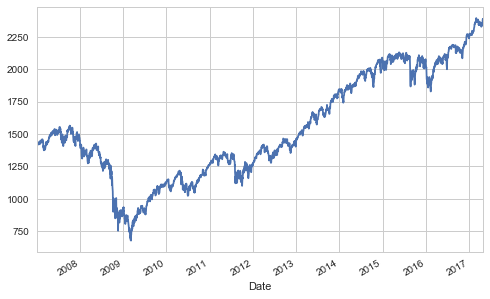

In [6]:
df['SPX'].plot()

# PLOT SPX DATA WITH MOVING AVERAGES

Axes(0.125,0.2;0.775x0.68)


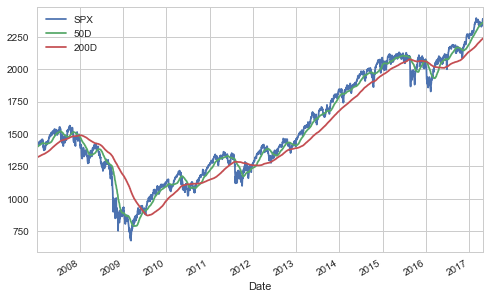

In [7]:
print df[['SPX', '50D','200D']].plot()
df['50D-200D'] = df['50D'] - df['200D']

# ESTABLISH POSITION PARAMETERS FOR STRATEGY

In [ ]:
x = 50
df['Position'] = np.where(df['50D-200D'] > X, 1, 0)
df['Position'] = np.where(df['50D-200D'] < X, -1, df['Position'])

# DEVELOP/VISUALIZE TRADING SIGNALS

-1    1692
 1     907
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


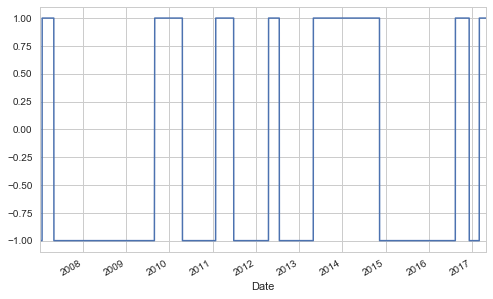

In [44]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

# TRANSFORM AND PLOT MKT RETURNS VS RETURNS TO TRADING STRATEGY

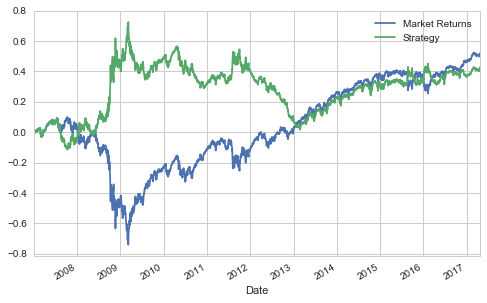

In [10]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

df[['Market Returns', 'Strategy']].cumsum().plot()

# 30-100 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


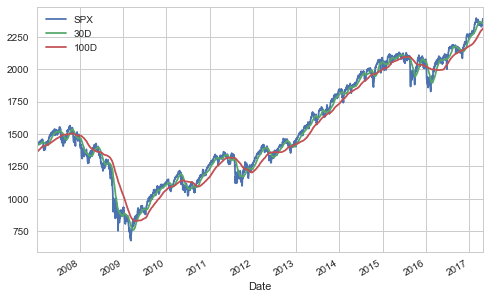

In [11]:
print df[['SPX', '30D','100D']].plot()
df['30D-100D'] = df['30D'] - df['100D']

In [13]:
X = 50
df['Position'] = np.where(df['30D-100D'] > X, 1, 0)
df['Position'] = np.where(df['30D-100D'] < X, -1, df['Position'])

-1    1907
 1     692
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


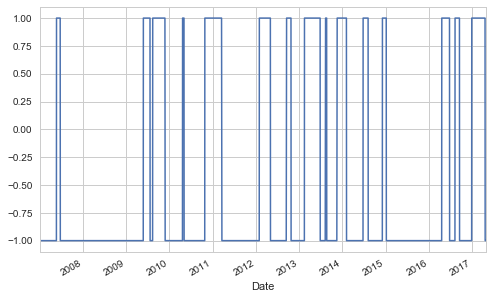

In [14]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [15]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

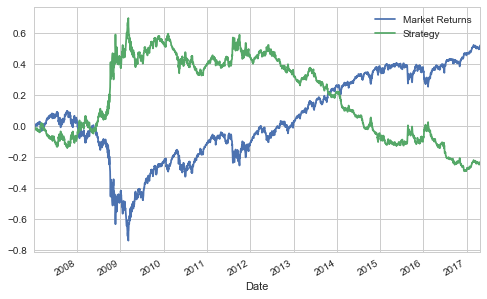

In [16]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 30-200 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


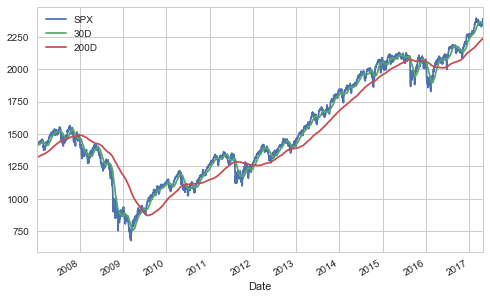

In [17]:
print df[['SPX', '30D','200D']].plot()
df['30D-200D'] = df['30D'] - df['200D']

In [18]:
X = 50
df['Position'] = np.where(df['30D-200D'] > X, 1, 0)
df['Position'] = np.where(df['30D-200D'] < X, -1, df['Position'])

 1    1493
-1    1106
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


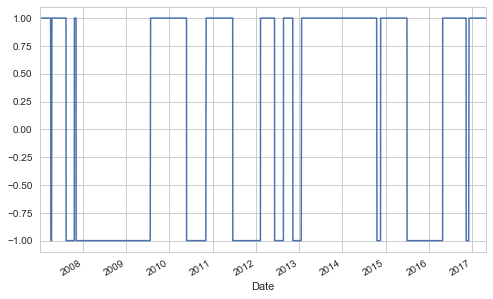

In [19]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [20]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

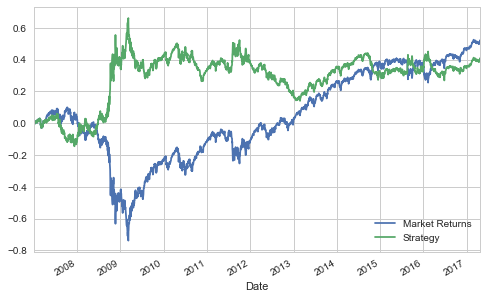

In [21]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 50-100 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


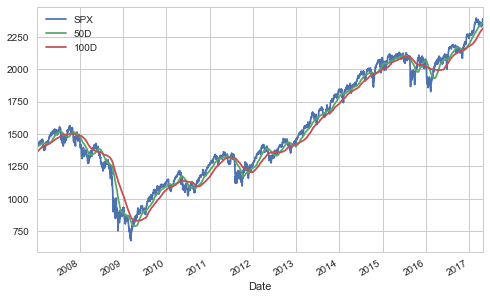

In [29]:
print df[['SPX', '50D','100D']].plot()
df['50D-100D'] = df['50D'] - df['100D']

In [30]:
X = 50
df['Position'] = np.where(df['50D-100D'] > X, 1, 0)
df['Position'] = np.where(df['50D-100D'] < X, -1, df['Position'])

-1    2402
 1     197
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


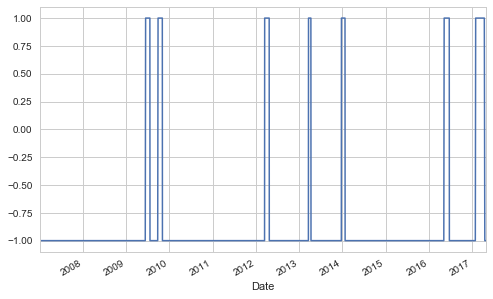

In [31]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [32]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

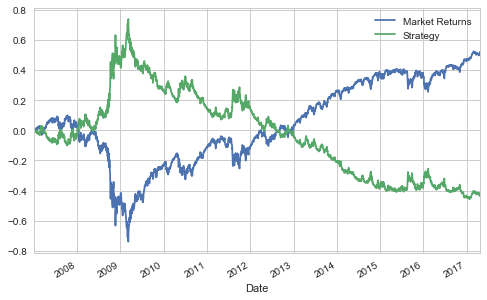

In [33]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 20-200 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


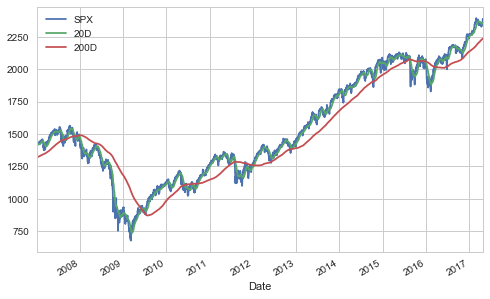

In [45]:
print df[['SPX', '20D','200D']].plot()
df['20D-200D'] = df['20D'] - df['200D']

In [46]:
X = 50
df['Position'] = np.where(df['20D-200D'] > X, 1, 0)
df['Position'] = np.where(df['20D-200D'] < X, -1, df['Position'])

 1    1515
-1    1084
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


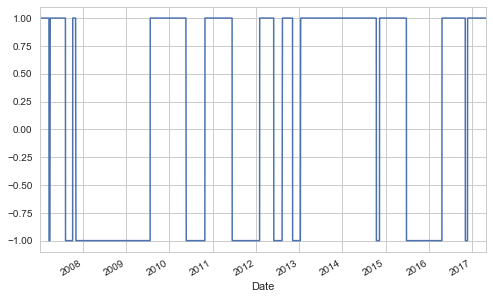

In [47]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [48]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

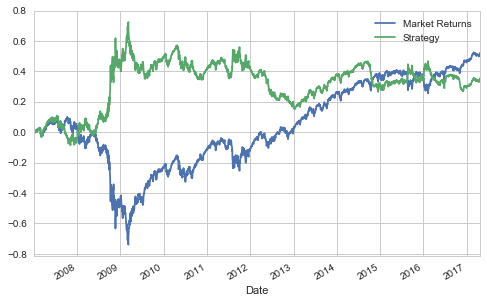

In [49]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 100-200 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


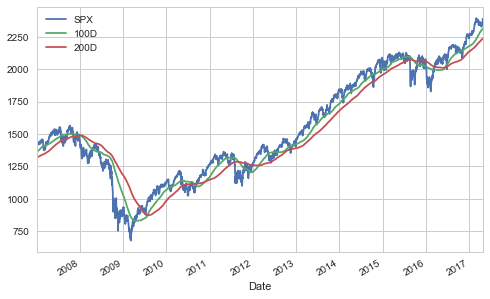

In [39]:
print df[['SPX', '100D','200D']].plot()
df['100D-200D'] = df['100D'] - df['200D']

In [40]:
X = 50
df['Position'] = np.where(df['100D-200D'] > X, 1, 0)
df['Position'] = np.where(df['100D-200D'] < X, -1, df['Position'])

-1    1692
 1     907
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


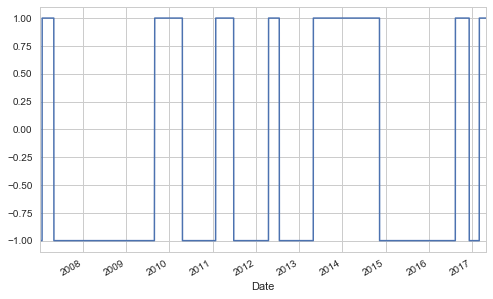

In [41]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [42]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

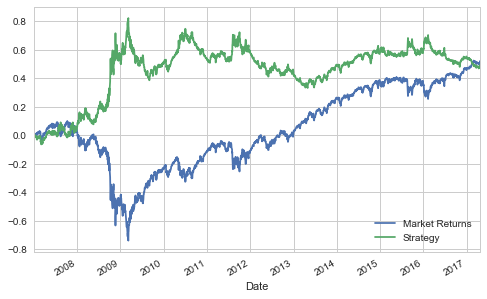

In [43]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 10-100 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


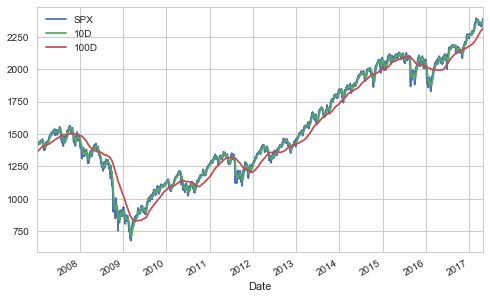

In [52]:
print df[['SPX', '10D','100D']].plot()
df['10D-100D'] = df['10D'] - df['100D']

In [53]:
X = 50
df['Position'] = np.where(df['10D-100D'] > X, 1, 0)
df['Position'] = np.where(df['10D-100D'] < X, -1, df['Position'])

-1    1624
 1     975
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


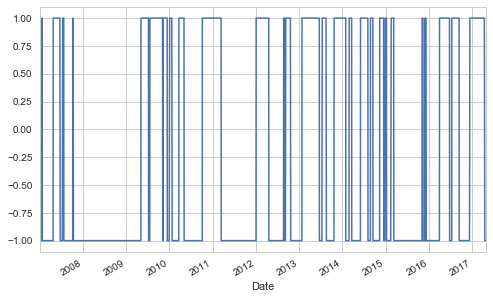

In [54]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [55]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

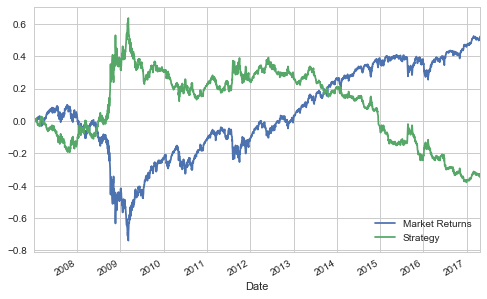

In [56]:
df[['Market Returns', 'Strategy']].cumsum().plot()

# 10-200 DAY MOVING AVERAGE STRATEGY

Axes(0.125,0.2;0.775x0.68)


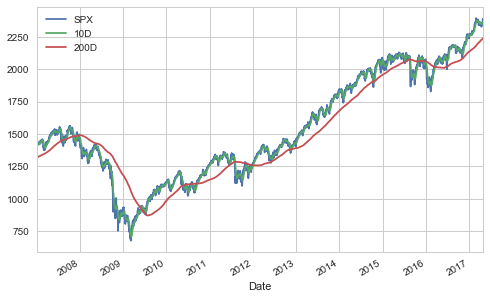

In [57]:
print df[['SPX', '10D','200D']].plot()
df['10D-200D'] = df['10D'] - df['200D']

In [58]:
X = 50
df['Position'] = np.where(df['10D-200D'] > X, 1, 0)
df['Position'] = np.where(df['10D-200D'] < X, -1, df['Position'])

 1    1503
-1    1096
Name: Position, dtype: int64
Axes(0.125,0.2;0.775x0.68)


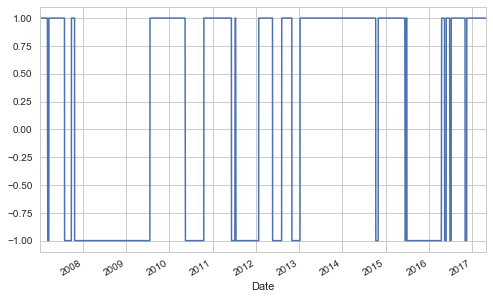

In [59]:
print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [60]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

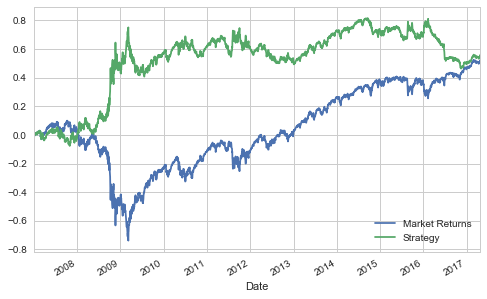

In [61]:
df[['Market Returns', 'Strategy']].cumsum().plot()

####  RESULTS
# 50-200 - POSITIVE
# 30-100 - NEGATIVE
# 30-200 - POSITIVE
# 50-100 - NEGATIVE
# 20-200 - POSITIVE
# 100-200 - POSITIVE
# 10-100 - NEGATIVE
# 10-200 - POSITIVE

# Code

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 8,5
sb.set_style('whitegrid')

address = 'C:/final_data.csv'
df = pd.read_csv(address, index_col='Date', parse_dates=True)
print df.head()
print df.tail()

df['SPX'].plot()

print df[['SPX', '50D','200D']].plot()
df['50D-200D'] = df['50D'] - df['200D']

X = 50
df['Position'] = np.where(df['50D-200D'] > X, 1, 0)
df['Position'] = np.where(df['50D-200D'] < X, -1, df['Position'])

print df['Position'].value_counts()
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

df[['Market Returns', 'Strategy']].cumsum().plot()

In [63]:
stock = 'C:/Users/Jason Alexander/Downloads/FINAL_STOCKS.csv'
stocks = pd.read_csv(stock, index_col='Date', parse_dates=True)
stocks

,AMD,AMD_10D,AMD_20D,AMD_30D,AMD_50D,AMD_100D,AMD_200D,C,C_10D,C_20D,...,CL_50D,CL_100D,CL_200D,COP,COP_10D,COP_20D,COP_30D,COP_50D,COP_100D,COP_200D
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,19.52,20.892,21.0465,21.2020,21.1426,22.8918,25.5296,552.50,553.500,535.9900,...,32.3836,31.4223,30.5724,51.9826,54.7186,54.1610,52.5948,50.3574,48.5882,49.1051
2007-01-04,19.79,20.674,20.9840,21.1467,21.1360,22.8896,25.4578,550.60,553.120,538.5200,...,32.4338,31.4522,30.5943,50.3665,54.2284,54.1156,52.6804,50.4368,48.5727,49.1271
2007-01-05,19.71,20.481,20.9025,21.0890,21.1254,22.8889,25.3841,547.70,552.660,540.6500,...,32.4853,31.4819,30.6140,51.3956,53.8008,54.0901,52.7973,50.5391,48.5654,49.1573
2007-01-08,19.47,20.243,20.8015,21.0300,21.1084,22.8849,25.3096,550.50,552.550,542.7850,...,32.5377,31.5122,30.6332,52.0665,53.4806,54.0676,52.8984,50.6443,48.5767,49.1871
2007-01-09,19.65,20.113,20.7315,20.9593,21.0848,22.8727,25.2341,545.70,552.360,544.7150,...,32.5728,31.5401,30.6540,50.7019,53.0567,53.9464,52.9498,50.7016,48.5731,49.2077
2007-01-10,20.01,20.037,20.6855,20.8997,21.0550,22.8471,25.1535,541.30,551.940,545.8550,...,32.6054,31.5714,30.6746,49.1925,52.5597,53.6982,52.9559,50.7371,48.5566,49.2182
2007-01-11,20.18,19.995,20.6600,20.8447,21.0414,22.8069,25.0778,541.70,550.990,546.5000,...,32.6353,31.6078,30.6960,47.1266,51.8073,53.3578,52.8956,50.7467,48.5226,49.2133
2007-01-12,18.26,19.751,20.5495,20.7223,20.9802,22.7502,24.9986,543.80,548.960,547.5650,...,32.6657,31.6470,30.7200,48.6589,51.1738,53.0998,52.8682,50.8082,48.5030,49.2136
2007-01-16,18.13,19.507,20.4475,20.6130,20.9174,22.6975,24.9178,547.70,547.850,548.7900,...,32.6946,31.6850,30.7430,47.8813,50.4222,52.7876,52.7757,50.8474,48.4721,49.2061
